FileNotFoundError: [Errno 2] No such file or directory: 'output/plots/rs_charts_raw.png'

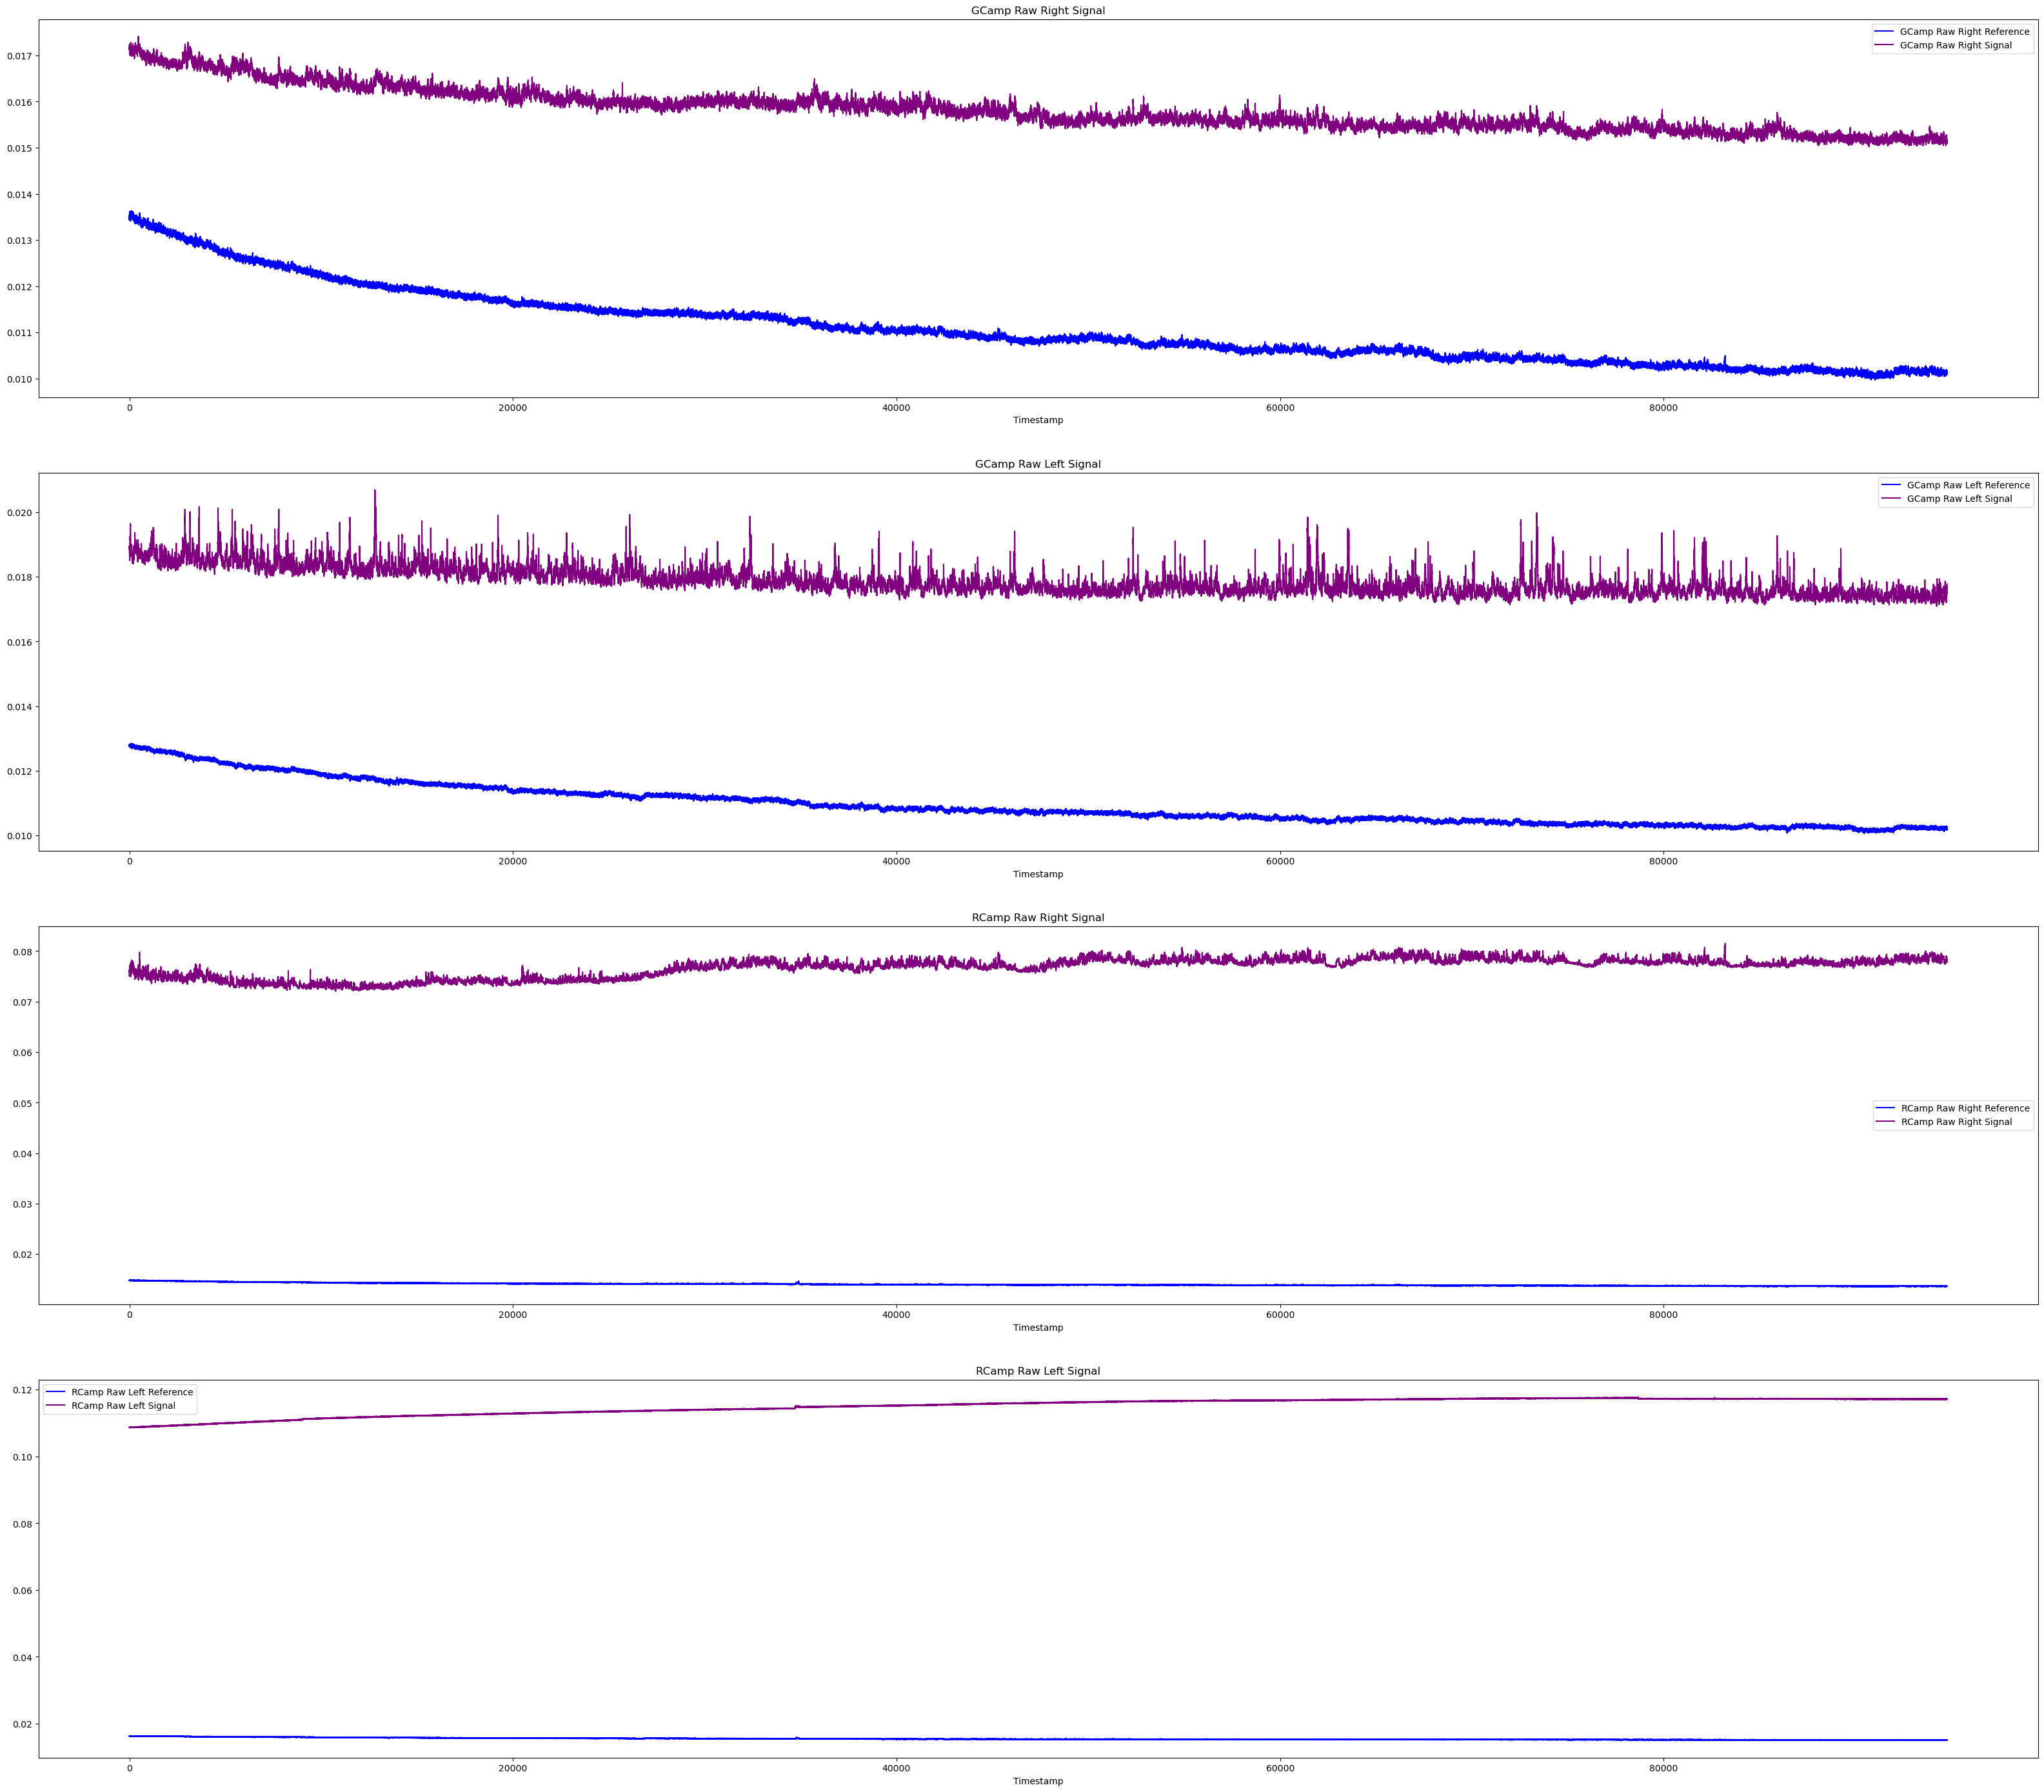

In [1]:
import saga_operations as so
import saga_io as io
import saga_plot as sp
import constants


df = io.load_csv(
    path=constants.DF_PATH,
    usecols=constants.COLUMNS_IN_USE,
)

key_df = io.load_csv(
    path=constants.KEY_PATH,
    usecols=["Timestamp", "Value.Seconds", "Value.Value"],
)

df_dict = so.deinterleave(df, start=constants.START_DEINTERLEAVE)
regions_dict = so.give_me_relevant_regions(df_dict)
sp.plot_rs_data(regions_dict, 'Raw')
smooth_dict = so.smooth_signals(regions_dict)
sp.plot_rs_data(smooth_dict, 'Smooth')
corrected_dict = so.correct_signals(smooth_dict)
pellets = so.give_me_pellets(df_dict["reference"], key_df)
sp.plot_corrected(corrected_dict, pellets, title_keyword='Corrected')
fit_dict = so.fit(df_dict, corrected_dict)
sp.plot_fit(df_dict, corrected_dict, fit_dict)
fitsub_dict = so.subtract_fits(df_dict, fit_dict, corrected_dict)
sp.plot_corrected(fitsub_dict, pellets, title_keyword='Fit')
chopped_dict = so.chop_up(fitsub_dict, pellets)
avg_dff_dict = so.avg_dff(chopped_dict)
all_trials_dict, error_dict = so.normalized_signal(chopped_dict, avg_dff_dict)
sp.plot_normalized(all_trials_dict, error_dict)
